In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk65 import rk_defect_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 16
nsuccessful_steps = 16
integration complete


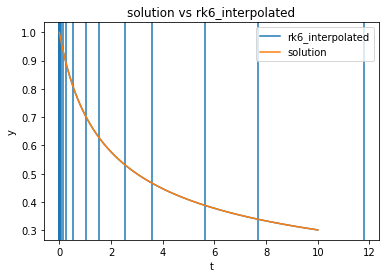

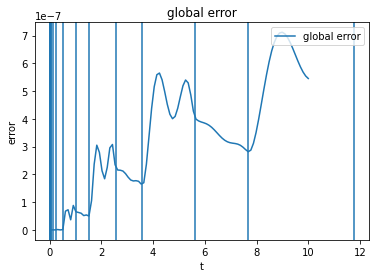

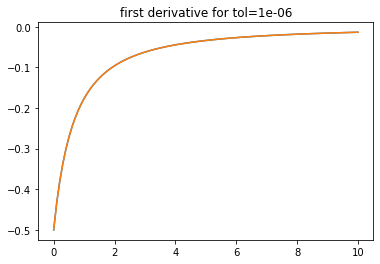

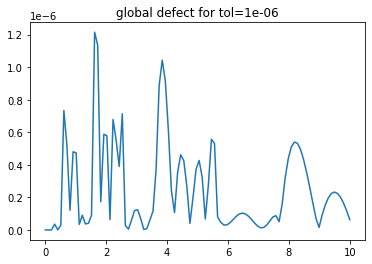

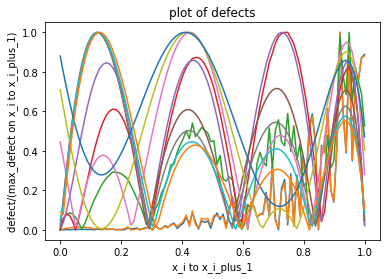

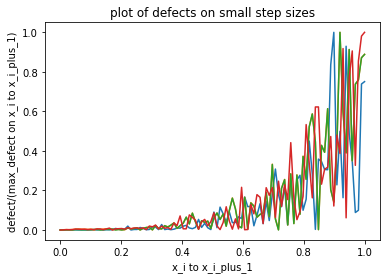

0.0
0.0
2.220446049250313e-16
3.3306690738754696e-16
4.440892098500626e-16
1.3322676295501878e-15
6.661338147750939e-15
3.3306690738754696e-15
6.208478176006338e-12
9.865982475432133e-10
6.158271947942495e-08
4.867991398871396e-08
2.1964205376701074e-07
1.6075691539052528e-07
4.012192195146369e-07
2.816440192177083e-07
4.966222431068701e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 35
nsuccessful_steps = 26
integration complete


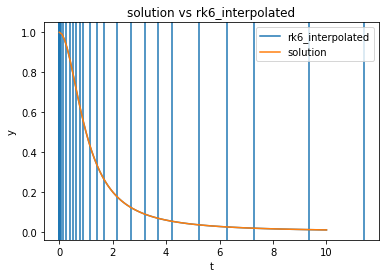

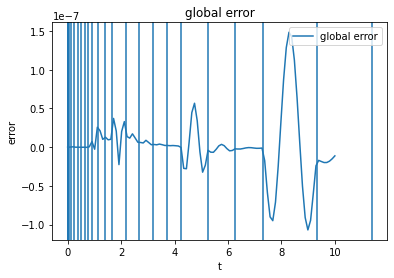

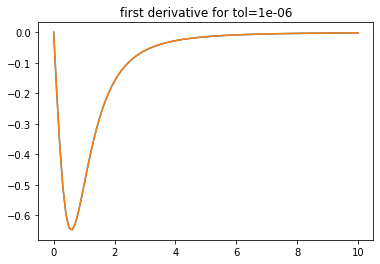

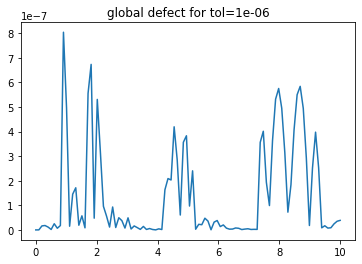

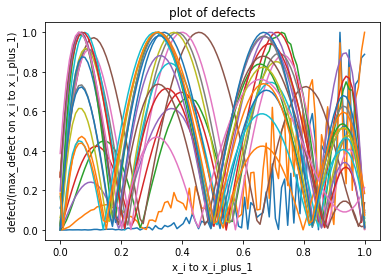

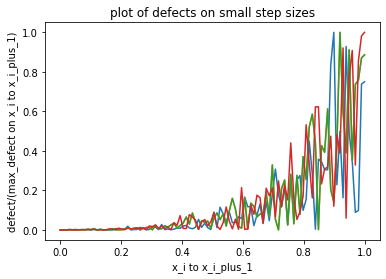

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
7.549516567451064e-15
1.7135182162064666e-12
2.786937347565299e-10
3.2996383403371965e-10
1.9824419883462951e-10
9.367950859484608e-12
1.7617107772593954e-10
2.571962642861081e-10
1.508396940685941e-08
1.2771786128684681e-08
8.651968586015357e-09
1.743854655122945e-08
7.570919571819879e-09
3.824964373011497e-09
2.2093195051198222e-09
1.373562194539879e-09
4.154992051808026e-09
2.2111868655527722e-09
1.1816338844894414e-09
1.7048217398549226e-08
8.256785675314626e-09


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 17
nsuccessful_steps = 15
integration complete


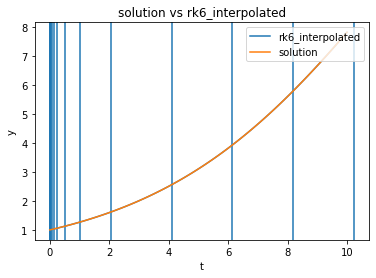

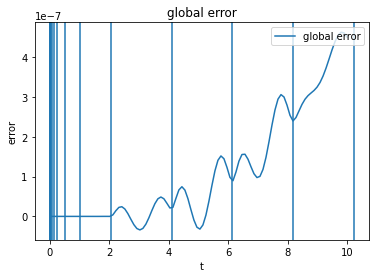

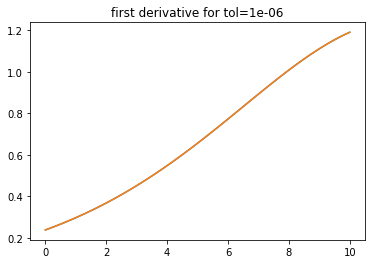

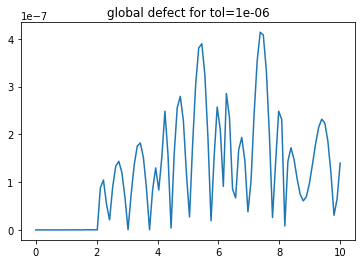

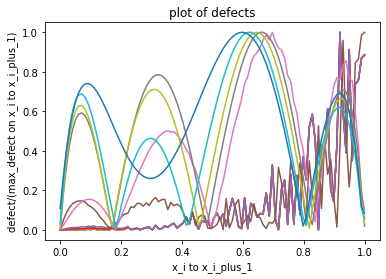

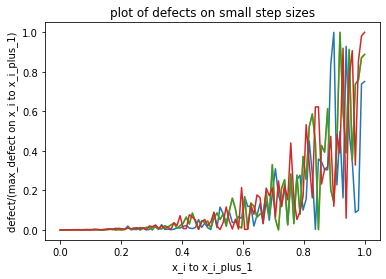

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
3.9968028886505635e-15
9.769962616701378e-15
4.063416270128073e-14
1.9317880628477724e-13
9.887424212706719e-12
1.8731226791857125e-08
8.860388778231254e-08
2.4017684285837504e-07
4.222159617484067e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 1405
nsuccessful_steps = 1252
integration complete


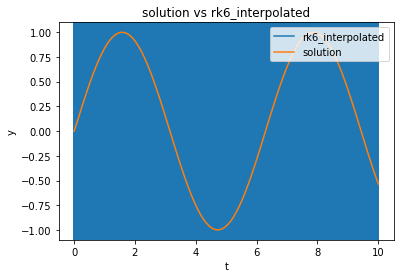

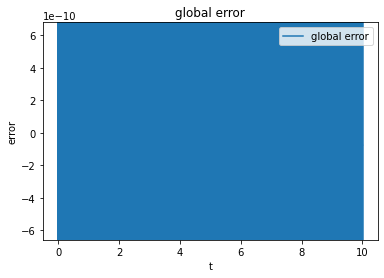

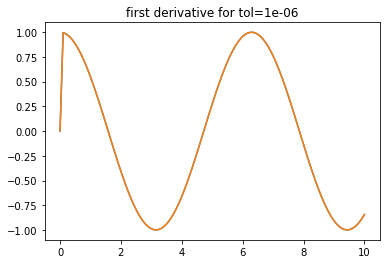

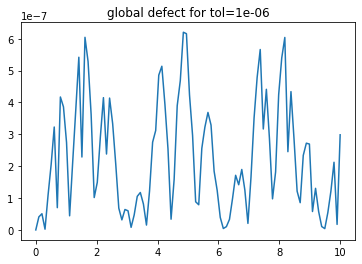

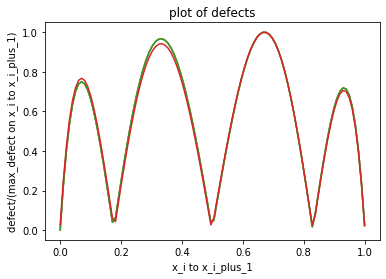

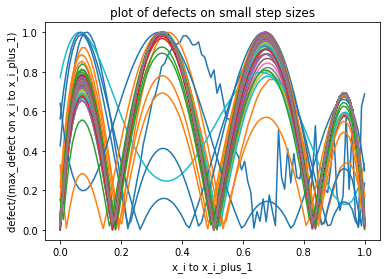

0.0
1.7625739192825285e-16
7.87670709906374e-14
1.849013650523368e-11
2.475145002150958e-11
2.4874885137804448e-11
2.2230354709829037e-11
1.8617517250074656e-11
1.496662516142777e-11
1.1707704250518702e-11
8.973734949568879e-12
1.7283308118010154e-10
1.5604293551740867e-10
1.0831976288150358e-10
6.941722197062461e-11
4.460073976808587e-11
3.0672089867955776e-11
2.369152096726168e-11
2.0715928972236952e-11
1.997872700609804e-11
2.050537517561679e-11
2.150910005660478e-11
2.297437240450506e-11
2.4530044662185446e-11
2.6148222476152228e-11
2.7838481519992797e-11
2.948974398009341e-11
3.113648228136867e-11
3.282871197107795e-11
3.453470842629258e-11
3.621278277243789e-11
3.7936209729139136e-11
3.966005301947462e-11
4.135594644516516e-11
4.301800582418025e-11
4.46526426944871e-11
4.6327885971919613e-11
4.799613484429699e-11
4.97214491801401e-11
5.136957526019614e-11
5.299399807867644e-11
5.466604946491316e-11
5.634487321160009e-11
5.804090541516871e-11
5.972400352050045e-11
6.13140649363686

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 541
nsuccessful_steps = 337
integration complete


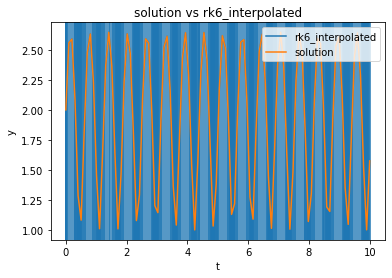

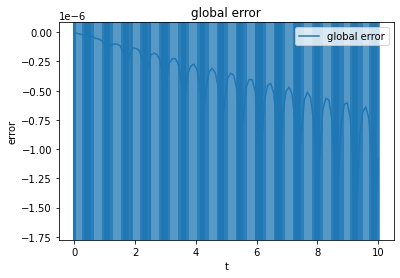

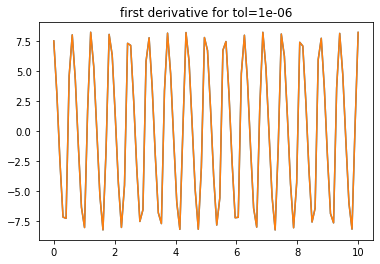

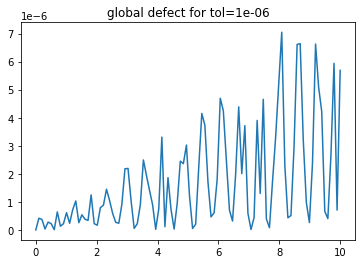

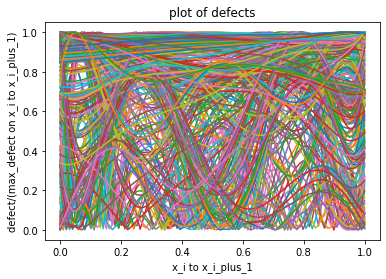

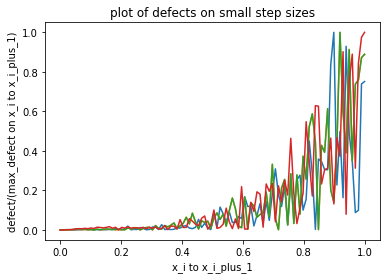

0.0
0.0
8.881784197001252e-16
3.552713678800501e-15
6.217248937900877e-15
3.9035441545820504e-13
7.755973641110359e-11
1.0954574580779308e-08
1.5613667692093713e-08
1.985966679995954e-08
2.1606364697390745e-08
2.4172041479531003e-08
2.788980313361833e-08
3.0217251589803595e-08
3.2937488514406255e-08
3.604254317224331e-08
3.942848203486449e-08
4.281745447087815e-08
4.572370282396321e-08
4.758040517138795e-08
4.790417507116729e-08
4.6432744538194015e-08
4.3563385565548174e-08
4.012911758444204e-08
3.977361928697576e-08
3.720075736346473e-08
3.325863628944603e-08
3.001976756067393e-08
5.040929096367108e-08
5.5116192054782687e-08
6.101923721857361e-08
7.205745156113608e-08
8.018916419771926e-08
9.188323102371498e-08
1.0834024499750683e-07
1.1845445602176596e-07
1.2965498652484087e-07
1.4120185465316126e-07
1.5161174227174e-07
1.5878381720568768e-07
1.6077212405818386e-07
1.5681957576951788e-07
1.480598175174208e-07
1.3687618172220084e-07
1.1984416192767355e-07
1.0528930816100512e-07
9.2320

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 16
nsuccessful_steps = 16
integration complete


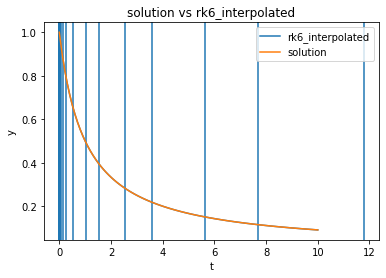

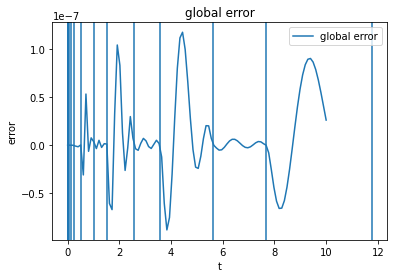

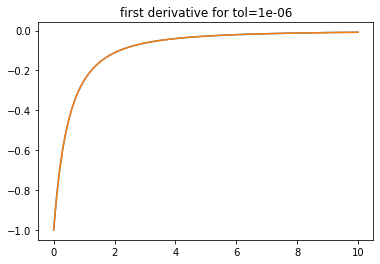

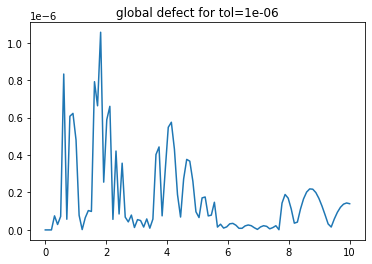

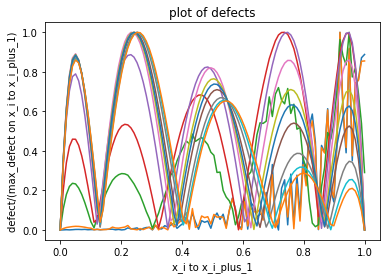

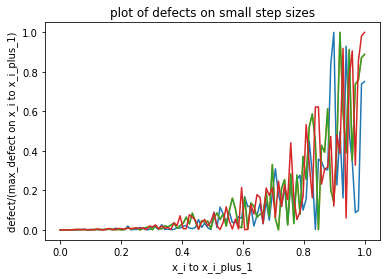

0.0
2.220446049250313e-16
3.3306690738754696e-16
5.551115123125783e-16
1.1102230246251565e-15
1.6653345369377348e-15
7.105427357601002e-15
2.4646951146678475e-14
1.333377852574813e-13
3.6270986214503864e-13
8.413825192121749e-13
8.438805210175815e-13
9.022782521128647e-13
7.841782778683637e-13
7.609468610780823e-13
7.167044735467698e-13
6.732392421326949e-13


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 19
nsuccessful_steps = 19
integration complete


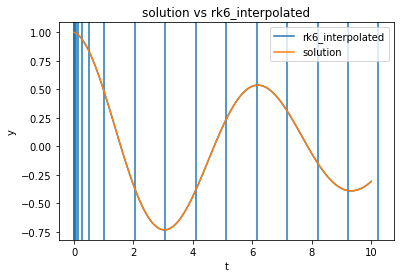

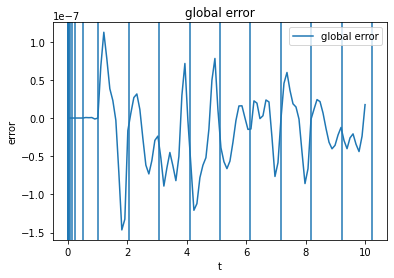

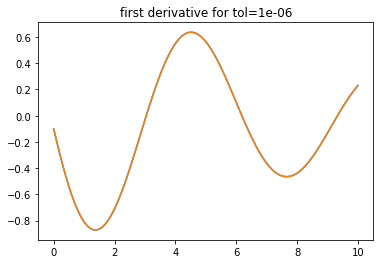

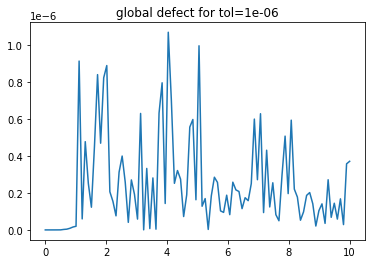

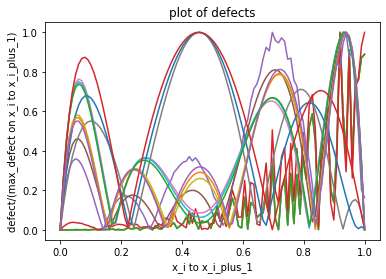

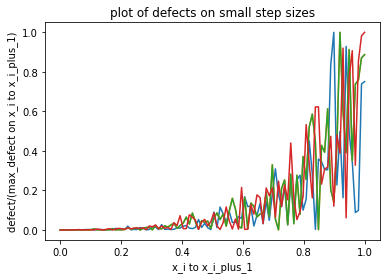

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-15
1.5543122344752192e-15
3.7569947153315297e-13
7.460493334221496e-11
3.181468144486388e-09
2.551261812921979e-08
4.1634491632080994e-08
3.6598790942310444e-08
1.6953570658451156e-08
1.0079589940481526e-09
5.951923676139614e-10
1.1890045059637089e-08
2.1645833403471926e-08


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 37
nsuccessful_steps = 29
integration complete


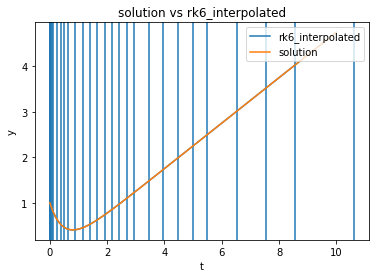

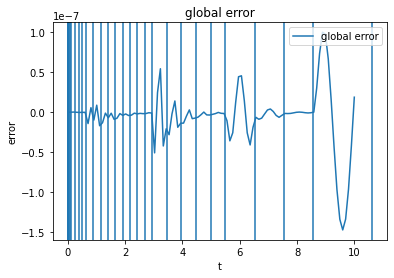

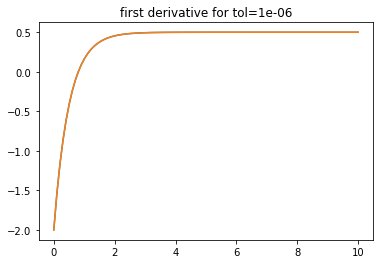

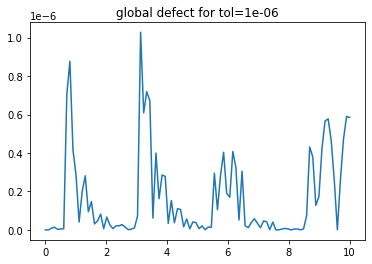

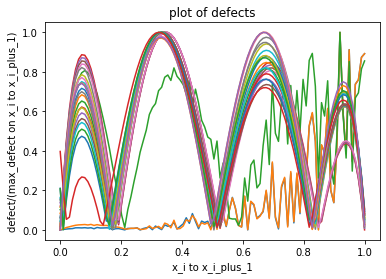

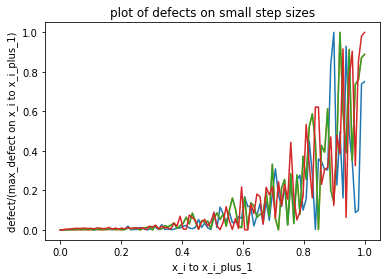

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-15
3.774758283725532e-15
1.1102230246251565e-14
3.6637359812630166e-14
2.8332891588433995e-13
6.572031807650092e-11
1.0195833066717341e-10
1.1836515101393275e-10
1.2208001276547975e-10
6.1863782985227544e-09
7.370913601700835e-09
6.6124733466566e-09
5.278155801313744e-09
3.951336924323812e-09
2.840170543194631e-09
1.9852095523020807e-09
1.3590317760048265e-09
9.158194202996128e-10
1.2327027398839618e-08
8.736238843454203e-09
4.684449717018424e-09
2.2359003537530953e-09
1.0008487372203945e-09
6.05380412466161e-09
1.5350969384542168e-09
2.8627678005932466e-10
7.929479295398778e-09


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)